In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib as plt

In [26]:
data = pd.read_csv('Mall_Customers.csv')
data.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
misssing_values = data.isnull()
print(misssing_values)

     CustomerID  Genre    Age  Annual Income (k$)  Spending Score (1-100)
0         False  False  False               False                   False
1         False  False  False               False                   False
2         False  False  False               False                   False
3         False  False  False               False                   False
4         False  False  False               False                   False
..          ...    ...    ...                 ...                     ...
195       False  False  False               False                   False
196       False  False  False               False                   False
197       False  False  False               False                   False
198       False  False  False               False                   False
199       False  False  False               False                   False

[200 rows x 5 columns]


In [29]:
duplicates = data.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


In [32]:
#Here i am performing one-hot encoding technique in my categorical data colume i.e. "genre"

df = pd.DataFrame(data)

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Display the encoded DataFrame
print(df)
 

     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1      1   19                  15                      39
1             2      1   21                  15                      81
2             3      0   20                  16                       6
3             4      0   23                  16                      77
4             5      0   31                  17                      40
..          ...    ...  ...                 ...                     ...
195         196      0   35                 120                      79
196         197      0   45                 126                      28
197         198      1   32                 126                      74
198         199      1   32                 137                      18
199         200      1   30                 137                      83

[200 rows x 5 columns]


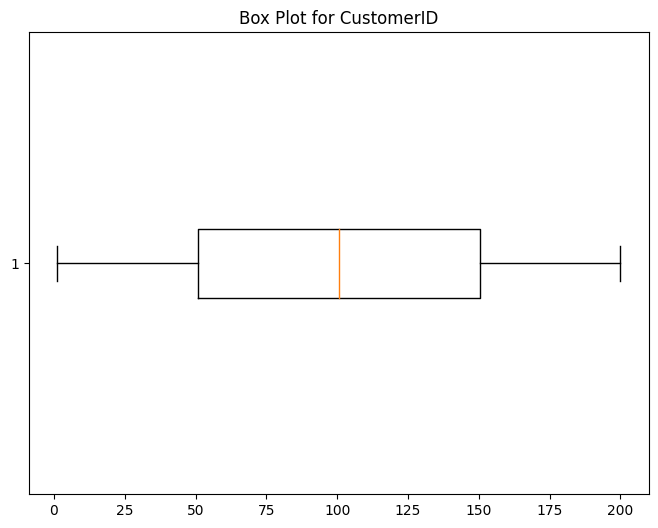

count    200.000000
mean     100.500000
std       57.879185
min        1.000000
25%       50.750000
50%      100.500000
75%      150.250000
max      200.000000
Name: CustomerID, dtype: float64
Potential outliers in CustomerID:
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


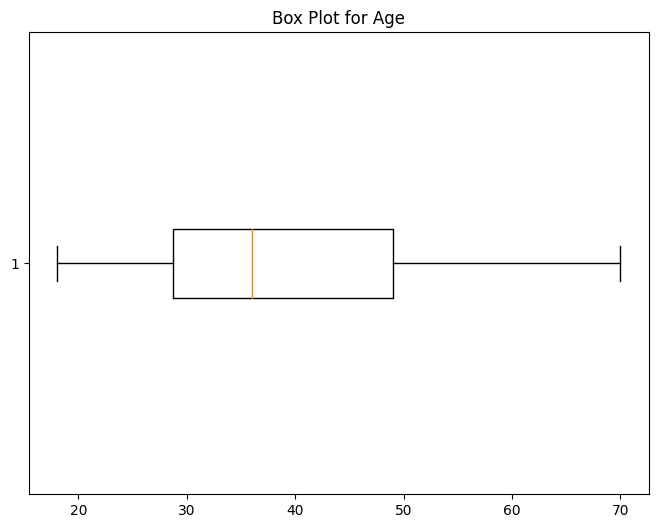

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64
Potential outliers in Age:
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


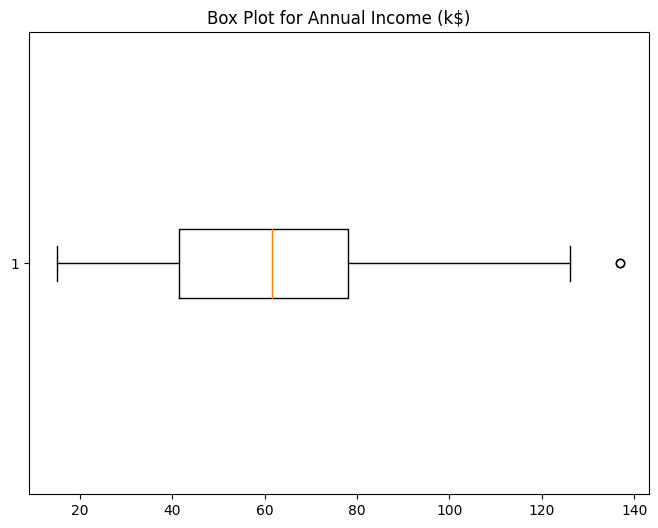

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64
Potential outliers in Annual Income (k$):
     CustomerID Genre  Age  Annual Income (k$)  Spending Score (1-100)
198         199  Male   32                 137                      18
199         200  Male   30                 137                      83


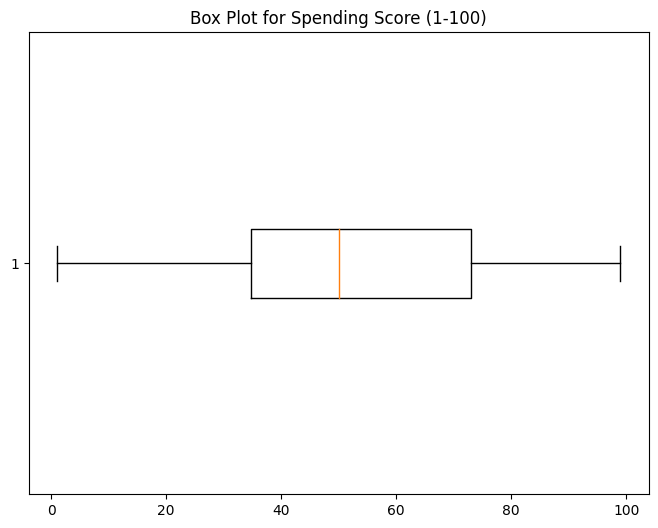

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64
Potential outliers in Spending Score (1-100):
Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [33]:
#detecting outliers
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset (replace with your own dataset)

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Iterate over numeric columns
for column_name in df.select_dtypes(include=['number']).columns:
    # To visualize potential outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column_name], vert=False)
    plt.title(f'Box Plot for {column_name}')
    plt.show()

    summary_stats = df[column_name].describe()
    print(summary_stats)

    # Function to detect potential outliers using the IQR method
    def detect_outliers_iqr(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (data < lower_bound) | (data > upper_bound)

    # Detect and print potential outliers using the IQR method
    outliers = detect_outliers_iqr(df[column_name])
    potential_outliers = df[outliers]
    print(f"Potential outliers in {column_name}:")
    print(potential_outliers)
